In [1]:
# !git clone https://github.com/kakao/khaiii.git
# !pip install cmake
# !mkdir build
# !cd build && cmake /content/khaiii
# !cd /content/build/ && make all
# !cd /content/build/ && make resource
# !cd /content/build && make install
# !cd /content/build && make package_python
# !pip install /content/build/package_python

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter
from typing import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")

from khaiii import KhaiiiApi

In [5]:
import nltk
# nltk.download('stopwords')

In [6]:
train = pd.read_json("/content/drive/MyDrive/멜론 플레이리스트/arena_data/orig/train.json")
val_q_df = pd.read_json("/content/drive/MyDrive/멜론 플레이리스트/arena_data/questions/val.json") # val 데이터의 각 플레이스트를 50%로 분할
# val_a_df = pd.read_json("/content/drive/MyDrive/멜론 플레이리스트/arena_data/answers/val.json") # 정답 데이터
# train_df = pd.read_json("/content/drive/MyDrive/멜론 플레이리스트/태그 제목 전처리/train_df(tokenized_title).json")

In [7]:
train_df = pd.concat([train, val_q_df])
train_df

,tags,id,plylst_title,songs,like_cnt,updt_date
0,"[힐링, 휴식, 밤, 새벽]",147668,To. 힘들고 지친 분들에게,"[663185, 649626, 6855, 188486, 348451, 169945,...",12,2016-06-23 10:06:27.000
1,[팝],50422,130807-7,"[627035, 256438, 603324, 200889, 441319, 21689...",0,2013-08-15 13:17:11.000
2,[뉴에이지],116432,숙면을 위한 슬픈 마음을 달래 줄 피아노,"[129204, 369497, 649743, 344619, 110281, 63266...",23,2015-09-03 16:51:50.000
3,"[하드락, 록스피릿, 댄스]",55076,당신을 하얗게 불태울 곡들,"[677591, 420396, 104934, 119279, 251988, 58850...",1,2017-01-09 15:41:25.000
4,"[힐링, 휴식, 기분전환]",125064,[스피커 필수 / HIPHOP] 듣고 있음 꿀렁꿀렁이고 싶은 힙합음악!,"[704455, 694036, 508043, 154933, 57614, 645195...",715,2016-02-22 12:32:50.000
...,...,...,...,...,...,...
23010,[],132039,이것만 알아도 브릿팝 안다는 소리듣는다.,"[8778, 5725, 234307, 64368, 691112, 581349, 40...",232,2014-03-10 19:08:16.000
23011,[],21475,make015,"[470489, 72225, 387567, 328452, 517417, 690761...",0,2016-05-16 15:34:18.000
23012,"[힘들때, 지칠때, 힘내]",81196,"힘든 걸 알아, 말해주고 싶었어요","[448250, 131741, 531820, 616260, 639943, 13129...",13,2017-12-20 16:32:07.000
23013,[],151600,♥Christmas Music♥,[],8,2015-12-23 09:38:19.000


## 태그 형태소 분석

In [8]:
def flatten(list_of_list):
    flatten = [j for i in list_of_list for j in i]
    return flatten

def get_token(title: str, tokenizer):
    
    if len(title)== 0 or title== ' ':  # 제목이 공백인 경우 tokenizer에러 발생
        return []
    
    result = tokenizer.analyze(title)
    result = [(morph.lex, morph.tag) for split in result for morph in split.morphs]  # (형태소, 품사) 튜플의 리스트
    return result

def get_all_tags(df):
    tag_list = df['tags'].values.tolist()
    tag_list = flatten(tag_list)
    return tag_list

In [9]:
tokenizer = KhaiiiApi()
all_tag = get_all_tags(train_df)
token_tag = [get_token(x, tokenizer) for x in all_tag]  # 태그를 형태소 분석

In [10]:
token_itself = list(filter(lambda x: len(x)==1, token_tag))  # 태그 자체가 형태소여서 분리되지 않는 태그만 골라봅니다
token_itself = flatten(token_itself)
flatten_token = flatten(token_tag)

In [11]:
flatten_token

[('힐링', 'NNG'),
 ('휴식', 'NNG'),
 ('밤', 'NNG'),
 ('새벽', 'NNG'),
 ('팝', 'NNG'),
 ('뉴에이', 'NNG'),
 ('지', 'NNP'),
 ('하드락', 'NNG'),
 ('록스피릿', 'NNP'),
 ('댄스', 'NNG'),
 ('힐링', 'NNG'),
 ('휴식', 'NNG'),
 ('기분', 'NNG'),
 ('전환', 'NNG'),
 ('요즘', 'NNG'),
 ('듣', 'VV'),
 ('는', 'ETM'),
 ('노래', 'NNG'),
 ('카페', 'NNG'),
 ('인디', 'NNG'),
 ('로우파', 'NNP'),
 ('이', 'NNG'),
 ('감성', 'NNG'),
 ('자기', 'NP'),
 ('전', 'NNG'),
 ('에', 'JKB'),
 ('듣', 'VV'),
 ('기', 'ETN'),
 ('좋', 'VA'),
 ('은', 'ETM'),
 ('알앤비힙합', 'NNP'),
 ('댄스', 'NNG'),
 ('EDM', 'SL'),
 ('발라드', 'NNG'),
 ('휴식', 'NNG'),
 ('힐링', 'NNG'),
 ('여행', 'NNG'),
 ('산책', 'NNG'),
 ('밤', 'NNG'),
 ('까페', 'NNG'),
 ('새벽', 'NNG'),
 ('발라드', 'NNG'),
 ('일렉', 'NNP'),
 ('내한', 'NNG'),
 ('감성', 'NNG'),
 ('취향', 'NNG'),
 ('저격', 'NNG'),
 ('팝', 'NNG'),
 ('인디', 'NNG'),
 ('팝', 'NNG'),
 ('밴드', 'NNG'),
 ('레이니', 'NNP'),
 ('음색', 'NNG'),
 ('록', 'NNG'),
 ('LANY', 'SL'),
 ('카페', 'NNG'),
 ('피아노', 'NNG'),
 ('뉴에이', 'NNG'),
 ('지', 'NNP'),
 ('봄', 'NNG'),
 ('재즈', 'NNG'),
 ('슬픔', 'NNG'),
 ('이별', 'NNG'),


In [12]:
print('%-23s'%'# of original tag is', f'{len(all_tag):8,}')
print('%-23s'%'# of morpheme itself is', f'{len(token_itself):8,}')
print('%-23s'%'# of total token is', f'{len(flatten_token):8,}')

# of original tag is     408,069
# of morpheme itself is  285,244
# of total token is      619,209


In [13]:
# Counting Part of Speech (pos)
pos = [x[1] for x in flatten_token]
pos_count = Counter(pos)
popular_pos = pos_count.most_common()

In [14]:
popular_pos[:20]

[('NNG', 378174),
 ('NNP', 47355),
 ('ETM', 32158),
 ('SL', 26885),
 ('VV', 20555),
 ('XSA', 20161),
 ('XR', 16903),
 ('MAG', 10880),
 ('JX', 8760),
 ('ETN', 7228),
 ('EC', 7161),
 ('VA', 6866),
 ('SN', 6674),
 ('XSN', 4800),
 ('JKB', 4041),
 ('NNB', 3208),
 ('SS', 2882),
 ('VCP', 2874),
 ('JKS', 1899),
 ('VX', 1791)]

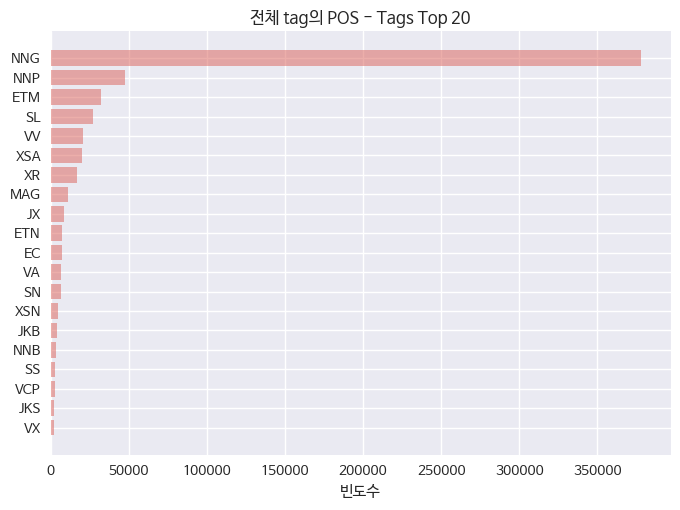

In [15]:
# 태그에서는 NNG(일반명사), NNP(고유명사) 제일 많았음, SL(외국어)도 플레이리스트를 표현하는데 중요한 단어임, VA(형용사), XSA(형용사 파생 접미사), XR(어근)플레이리스트의 분위기를 표현
# VV(동사)도 무엇을 할 때 듣는 음악을 표현
objects = [x[0] for x in popular_pos[:20]]
y_pos = np.arange(len(objects))
performance = [x[1] for x in popular_pos[:20]]

plt.rc('font', family='NanumBarunGothic') 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.gca().invert_yaxis()
plt.xlabel('빈도수')
plt.title('전체 tag의 POS - Tags Top 20')

plt.show()

In [16]:
get_token('행복한 크리스마스를 위한 잔잔한 연주곡', tokenizer)

[('행복', 'NNG'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('크리스마스', 'NNG'),
 ('를', 'JKO'),
 ('위하', 'VV'),
 ('ㄴ', 'ETM'),
 ('잔잔', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('연주곡', 'NNG')]

In [17]:
get_token('포근하고 따뜻한 뉴에이지', tokenizer)

[('포근', 'XR'),
 ('하', 'XSA'),
 ('고', 'EC'),
 ('따뜻', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('뉴에이', 'NNG'),
 ('지', 'NNP')]

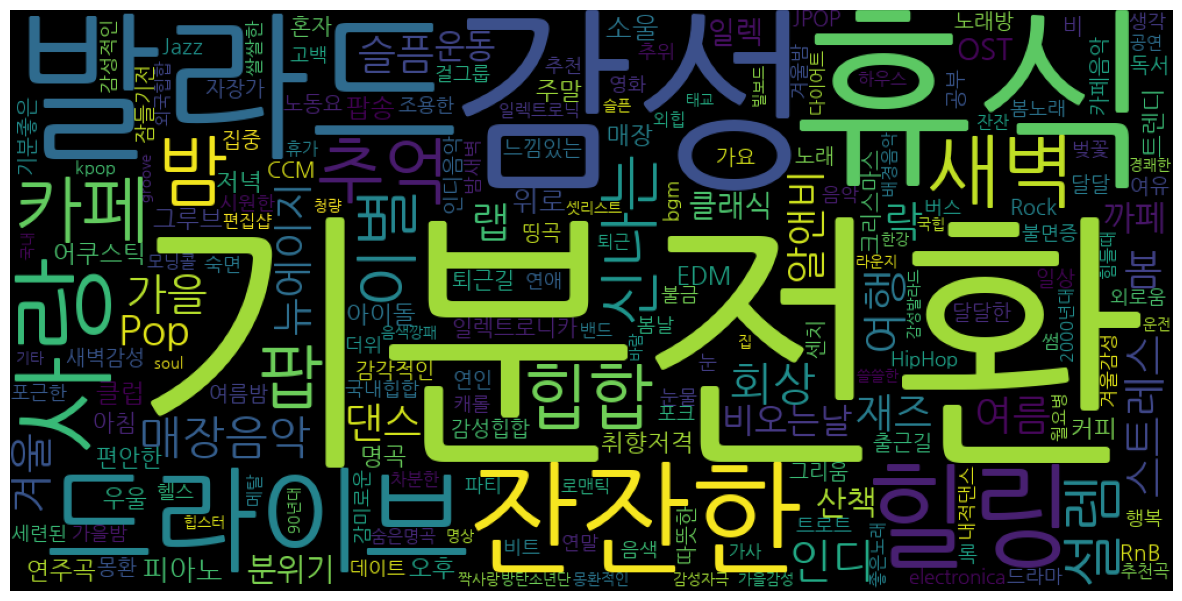

In [18]:
word_could_dict=Counter(all_tag)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=font_path, width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

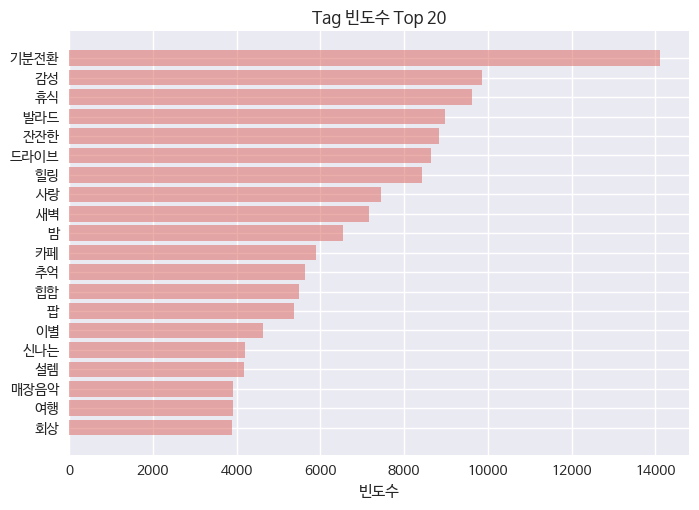

In [19]:
objects = [x[0] for x in Counter(all_tag).most_common()[:20]]
y_pos = np.arange(len(objects))
performance = [x[1] for x in Counter(all_tag).most_common()[:20]]

plt.rc('font', family='NanumBarunGothic') 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.gca().invert_yaxis()
plt.xlabel('빈도수')
plt.title('Tag 빈도수 Top 20')

plt.show()

## 플레이리스트 제목 전처리 및 형태소 분석

In [20]:
# 특수기호 제거
import re

# 특수기호를 나열한 패턴 문자열을 컴파일하여 패턴 객체를 얻는다.
p = re.compile('[◆ε◆\\\\ㅡ☆✪✿■②❣◈《》“”●○♡〃〃＃『』\♤♪✅✔♪♣↗→▲✨▶◀❤※★♥♬!@#$%\^&\*\(\)\-\=\[\]\{\}\.,/\?~\+\'"|_:;><`┃]')

# 문장의 특수기호 제거 함수
def remove_special_characters(sentence, lower=True):
    sentence = p.sub(' ', sentence) # 패턴 객체로 sentence 내의 특수기호를 공백문자로 치환한다.
    sentence = ' '.join(sentence.split()) # sentence 내의 두개 이상 연속된 빈공백들을 하나의 빈공백으로 만든다.
    if lower:
        sentence = sentence.lower()
    return sentence

def re_sub(series: pd.Series) -> pd.Series:
    series = series.str.replace(pat=r'[ㄱ-ㅎ]+', repl=r'', regex=True)  # ㅋ 제거용
    series = series.str.replace(pat=r'[ ]{2,}', repl=r' ', regex=True)  # 공백 제거
    series = series.str.replace(pat=r'[\u3000]+', repl=r'', regex=True)  # u3000 제거
    return series

In [21]:
train_df['plylst_title'] = train_df['plylst_title'].map(remove_special_characters)
train['plylst_title'] = re_sub(train['plylst_title'])
train_df.head() # 특수기호가 제거된 train_df의 상단 5행만 출력

,tags,id,plylst_title,songs,like_cnt,updt_date
0,"[힐링, 휴식, 밤, 새벽]",147668,to 힘들고 지친 분들에게,"[663185, 649626, 6855, 188486, 348451, 169945,...",12,2016-06-23 10:06:27.000
1,[팝],50422,130807 7,"[627035, 256438, 603324, 200889, 441319, 21689...",0,2013-08-15 13:17:11.000
2,[뉴에이지],116432,숙면을 위한 슬픈 마음을 달래 줄 피아노,"[129204, 369497, 649743, 344619, 110281, 63266...",23,2015-09-03 16:51:50.000
3,"[하드락, 록스피릿, 댄스]",55076,당신을 하얗게 불태울 곡들,"[677591, 420396, 104934, 119279, 251988, 58850...",1,2017-01-09 15:41:25.000
4,"[힐링, 휴식, 기분전환]",125064,스피커 필수 hiphop 듣고 있음 꿀렁꿀렁이고 싶은 힙합음악,"[704455, 694036, 508043, 154933, 57614, 645195...",715,2016-02-22 12:32:50.000


In [22]:
train_df[train_df['plylst_title'].str.contains('christmas', na = False)][-10:]

,tags,id,plylst_title,songs,like_cnt,updt_date
12773,[사랑],39941,all alone on christmas,[],30,2018-12-07 13:13:22.000
15293,[겨울],8138,just christmas,[],8,2019-11-04 01:01:28.000
15312,"[겨울, 메리크리스마스, 우리가, 크리스마스]",59993,it s christmas time,"[636255, 564722, 128270, 116127, 127023, 37595...",6,2016-11-30 11:21:10.000
17047,[크리스마스],7238,white christmas with jazz,"[261177, 410724, 409267, 604390, 88202]",6,2017-12-20 13:21:32.000
17100,"[추억, 겨울, 크리스마스, 신나는]",14816,merry christmas,"[570884, 396550, 152394, 691094, 137969, 21625...",26,2016-12-25 12:52:06.000
17301,[],106312,연인과 함께 하는 christmas,"[344559, 130045, 164891, 187395, 129397, 65475...",21,2016-12-24 11:25:38.000
18006,[],130090,편안하고 경쾌한 재즈캐롤 merry jazzy christmas,"[323215, 112928, 534880, 71374, 469093, 646115...",118,2017-11-21 13:04:48.000
19131,[],93604,christmas eddie higgins trio,"[435124, 652902, 705795, 630446, 659282, 51298...",4,2019-11-26 23:19:07.000
22985,[],90377,winter and christmas,"[541762, 614786, 332750, 588425, 613071, 681525]",0,2019-12-13 15:12:41.000
23013,[],151600,christmas music,[],8,2015-12-23 09:38:19.000


In [23]:
train_df[train_df['plylst_title'].str.contains('389', na = False)]

,tags,id,plylst_title,songs,like_cnt,updt_date
39871,"[힐링, 저녁]",49199,하루의 피로를 씻겨주는 음악 389,"[177460, 527560, 230103, 160291, 204313, 31719...",0,2019-05-09 13:51:18.000
9029,[저녁],71113,하루의 피로를 씻겨주는 음악 389,"[69419, 199965, 697427, 684125, 578170, 577639...",0,2019-05-09 13:51:18.000
20283,[],1096,크리스마스389,[],0,2019-11-19 15:10:47.000
23014,[],7706,라디오 389,"[243082, 383812, 218279, 297891]",7,2009-10-01 13:58:17.000


In [24]:
train_df.loc[:, 'ply_token'] = train_df['plylst_title'].map(lambda x: get_token(x, tokenizer))
train_df

,tags,id,plylst_title,songs,like_cnt,updt_date,ply_token
0,"[힐링, 휴식, 밤, 새벽]",147668,to 힘들고 지친 분들에게,"[663185, 649626, 6855, 188486, 348451, 169945,...",12,2016-06-23 10:06:27.000,"[(to, SL), (힘들, VA), (고, EC), (지치, VV), (ㄴ, ET..."
1,[팝],50422,130807 7,"[627035, 256438, 603324, 200889, 441319, 21689...",0,2013-08-15 13:17:11.000,"[(130807, SN), (7, SN)]"
2,[뉴에이지],116432,숙면을 위한 슬픈 마음을 달래 줄 피아노,"[129204, 369497, 649743, 344619, 110281, 63266...",23,2015-09-03 16:51:50.000,"[(숙면, NNG), (을, JKO), (위하, VV), (ㄴ, ETM), (슬프,..."
3,"[하드락, 록스피릿, 댄스]",55076,당신을 하얗게 불태울 곡들,"[677591, 420396, 104934, 119279, 251988, 58850...",1,2017-01-09 15:41:25.000,"[(당신, NP), (을, JKO), (하얗, VA), (게, EC), (불태, V..."
4,"[힐링, 휴식, 기분전환]",125064,스피커 필수 hiphop 듣고 있음 꿀렁꿀렁이고 싶은 힙합음악,"[704455, 694036, 508043, 154933, 57614, 645195...",715,2016-02-22 12:32:50.000,"[(스피커, NNG), (필수, NNG), (hiphop, SL), (듣, VV),..."
...,...,...,...,...,...,...,...
23010,[],132039,이것만 알아도 브릿팝 안다는 소리듣는다,"[8778, 5725, 234307, 64368, 691112, 581349, 40...",232,2014-03-10 19:08:16.000,"[(이것, NP), (만, JX), (알, VV), (아도, EC), (브릿팝, N..."
23011,[],21475,make015,"[470489, 72225, 387567, 328452, 517417, 690761...",0,2016-05-16 15:34:18.000,"[(make, SL), (015, SN)]"
23012,"[힘들때, 지칠때, 힘내]",81196,힘든 걸 알아 말해주고 싶었어요,"[448250, 131741, 531820, 616260, 639943, 13129...",13,2017-12-20 16:32:07.000,"[(힘들, VA), (ㄴ, ETM), (것, NNB), (ㄹ, JKO), (알, V..."
23013,[],151600,christmas music,[],8,2015-12-23 09:38:19.000,"[(christmas, SL), (music, SL)]"


In [25]:
flatten_title = []
for i in range(len(train_df)):
  for j in train_df['ply_token'].iloc[i]:
    flatten_title.append(j)

In [26]:
# Counting Part of Speech (pos)
title_pos = [x[1] for x in flatten_title]
pos_title_count = Counter(title_pos)
popular_title_pos = pos_title_count.most_common()

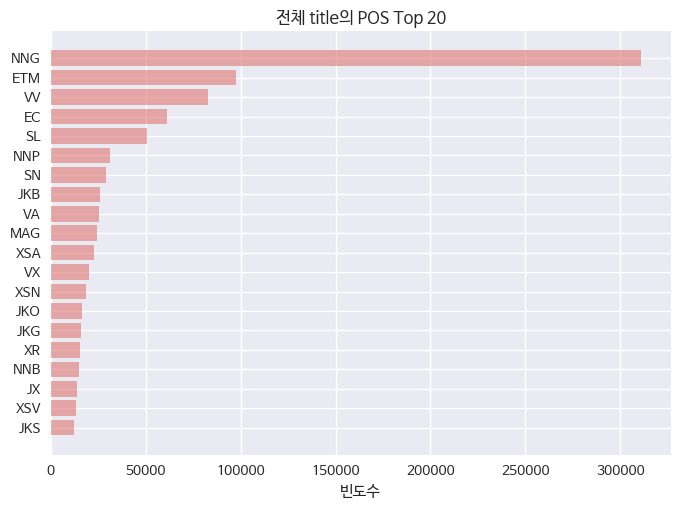

In [27]:
# 제목에서도 태그와 비슷하게 NNG(일반명사)가 많음
objects = [x[0] for x in popular_title_pos[:20]]
y_pos = np.arange(len(objects))
performance = [x[1] for x in popular_title_pos[:20]]

plt.rc('font', family='NanumBarunGothic') 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.gca().invert_yaxis()
plt.xlabel('빈도수')
plt.title('전체 title의 POS Top 20')

plt.show()

## 플레이리스트 제목에 필요한 형태소만 남김
- 제목에서도 태그와 비슷하게 NNG(일반명사), NNP(고유명사), SL(외국어), VA(형용사), XSA(형용사 파생 접미사), XR(어근), SN(숫자), VV(동사)를 태그와 같이 붙임

In [28]:
using_pos = ['NNG','NNP', 'SL', 'VA', 'XSA','XR', 'SN', 'VV']  # 일반 명사, 외국어, 고유 명사, 일반 부사, 숫자
train_df['ply_token'] = train_df['ply_token'].map(lambda x: list(filter(lambda x: x[1] in using_pos, x)))
train_df

,tags,id,plylst_title,songs,like_cnt,updt_date,ply_token
0,"[힐링, 휴식, 밤, 새벽]",147668,to 힘들고 지친 분들에게,"[663185, 649626, 6855, 188486, 348451, 169945,...",12,2016-06-23 10:06:27.000,"[(to, SL), (힘들, VA), (지치, VV)]"
1,[팝],50422,130807 7,"[627035, 256438, 603324, 200889, 441319, 21689...",0,2013-08-15 13:17:11.000,"[(130807, SN), (7, SN)]"
2,[뉴에이지],116432,숙면을 위한 슬픈 마음을 달래 줄 피아노,"[129204, 369497, 649743, 344619, 110281, 63266...",23,2015-09-03 16:51:50.000,"[(숙면, NNG), (위하, VV), (슬프, VA), (마음, NNG), (달래..."
3,"[하드락, 록스피릿, 댄스]",55076,당신을 하얗게 불태울 곡들,"[677591, 420396, 104934, 119279, 251988, 58850...",1,2017-01-09 15:41:25.000,"[(하얗, VA), (불태, VV), (울, NNG), (곡, NNG)]"
4,"[힐링, 휴식, 기분전환]",125064,스피커 필수 hiphop 듣고 있음 꿀렁꿀렁이고 싶은 힙합음악,"[704455, 694036, 508043, 154933, 57614, 645195...",715,2016-02-22 12:32:50.000,"[(스피커, NNG), (필수, NNG), (hiphop, SL), (듣, VV),..."
...,...,...,...,...,...,...,...
23010,[],132039,이것만 알아도 브릿팝 안다는 소리듣는다,"[8778, 5725, 234307, 64368, 691112, 581349, 40...",232,2014-03-10 19:08:16.000,"[(알, VV), (브릿팝, NNG), (알, VV), (소리, NNG), (듣, ..."
23011,[],21475,make015,"[470489, 72225, 387567, 328452, 517417, 690761...",0,2016-05-16 15:34:18.000,"[(make, SL), (015, SN)]"
23012,"[힘들때, 지칠때, 힘내]",81196,힘든 걸 알아 말해주고 싶었어요,"[448250, 131741, 531820, 616260, 639943, 13129...",13,2017-12-20 16:32:07.000,"[(힘들, VA), (알, VV), (말, NNG)]"
23013,[],151600,christmas music,[],8,2015-12-23 09:38:19.000,"[(christmas, SL), (music, SL)]"


In [29]:
train_df['filtered_title'] = train_df['ply_token'].map(lambda x: [tag[0] for tag in x])
train_df

,tags,id,plylst_title,songs,like_cnt,updt_date,ply_token,filtered_title
0,"[힐링, 휴식, 밤, 새벽]",147668,to 힘들고 지친 분들에게,"[663185, 649626, 6855, 188486, 348451, 169945,...",12,2016-06-23 10:06:27.000,"[(to, SL), (힘들, VA), (지치, VV)]","[to, 힘들, 지치]"
1,[팝],50422,130807 7,"[627035, 256438, 603324, 200889, 441319, 21689...",0,2013-08-15 13:17:11.000,"[(130807, SN), (7, SN)]","[130807, 7]"
2,[뉴에이지],116432,숙면을 위한 슬픈 마음을 달래 줄 피아노,"[129204, 369497, 649743, 344619, 110281, 63266...",23,2015-09-03 16:51:50.000,"[(숙면, NNG), (위하, VV), (슬프, VA), (마음, NNG), (달래...","[숙면, 위하, 슬프, 마음, 달래, 주, 피아노]"
3,"[하드락, 록스피릿, 댄스]",55076,당신을 하얗게 불태울 곡들,"[677591, 420396, 104934, 119279, 251988, 58850...",1,2017-01-09 15:41:25.000,"[(하얗, VA), (불태, VV), (울, NNG), (곡, NNG)]","[하얗, 불태, 울, 곡]"
4,"[힐링, 휴식, 기분전환]",125064,스피커 필수 hiphop 듣고 있음 꿀렁꿀렁이고 싶은 힙합음악,"[704455, 694036, 508043, 154933, 57614, 645195...",715,2016-02-22 12:32:50.000,"[(스피커, NNG), (필수, NNG), (hiphop, SL), (듣, VV),...","[스피커, 필수, hiphop, 듣, 꿀렁이, 힙합, 음악]"
...,...,...,...,...,...,...,...,...
23010,[],132039,이것만 알아도 브릿팝 안다는 소리듣는다,"[8778, 5725, 234307, 64368, 691112, 581349, 40...",232,2014-03-10 19:08:16.000,"[(알, VV), (브릿팝, NNG), (알, VV), (소리, NNG), (듣, ...","[알, 브릿팝, 알, 소리, 듣]"
23011,[],21475,make015,"[470489, 72225, 387567, 328452, 517417, 690761...",0,2016-05-16 15:34:18.000,"[(make, SL), (015, SN)]","[make, 015]"
23012,"[힘들때, 지칠때, 힘내]",81196,힘든 걸 알아 말해주고 싶었어요,"[448250, 131741, 531820, 616260, 639943, 13129...",13,2017-12-20 16:32:07.000,"[(힘들, VA), (알, VV), (말, NNG)]","[힘들, 알, 말]"
23013,[],151600,christmas music,[],8,2015-12-23 09:38:19.000,"[(christmas, SL), (music, SL)]","[christmas, music]"


In [30]:
train_df = train_df[['id','tags', 'ply_token', 'filtered_title', 'songs']]
train_df

,id,tags,ply_token,filtered_title,songs
0,147668,"[힐링, 휴식, 밤, 새벽]","[(to, SL), (힘들, VA), (지치, VV)]","[to, 힘들, 지치]","[663185, 649626, 6855, 188486, 348451, 169945,..."
1,50422,[팝],"[(130807, SN), (7, SN)]","[130807, 7]","[627035, 256438, 603324, 200889, 441319, 21689..."
2,116432,[뉴에이지],"[(숙면, NNG), (위하, VV), (슬프, VA), (마음, NNG), (달래...","[숙면, 위하, 슬프, 마음, 달래, 주, 피아노]","[129204, 369497, 649743, 344619, 110281, 63266..."
3,55076,"[하드락, 록스피릿, 댄스]","[(하얗, VA), (불태, VV), (울, NNG), (곡, NNG)]","[하얗, 불태, 울, 곡]","[677591, 420396, 104934, 119279, 251988, 58850..."
4,125064,"[힐링, 휴식, 기분전환]","[(스피커, NNG), (필수, NNG), (hiphop, SL), (듣, VV),...","[스피커, 필수, hiphop, 듣, 꿀렁이, 힙합, 음악]","[704455, 694036, 508043, 154933, 57614, 645195..."
...,...,...,...,...,...
23010,132039,[],"[(알, VV), (브릿팝, NNG), (알, VV), (소리, NNG), (듣, ...","[알, 브릿팝, 알, 소리, 듣]","[8778, 5725, 234307, 64368, 691112, 581349, 40..."
23011,21475,[],"[(make, SL), (015, SN)]","[make, 015]","[470489, 72225, 387567, 328452, 517417, 690761..."
23012,81196,"[힘들때, 지칠때, 힘내]","[(힘들, VA), (알, VV), (말, NNG)]","[힘들, 알, 말]","[448250, 131741, 531820, 616260, 639943, 13129..."
23013,151600,[],"[(christmas, SL), (music, SL)]","[christmas, music]",[]


In [31]:
train_df.to_json('train_df(filtered_title).json', orient = 'records')